# Classification Analysis - 3 - KNN Classification, Decision Tree Classification, Logistic Regression

## Import libraries and load dataset

In [63]:
# DataFrame Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# KNN Classifier Imports
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# DTC Imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression

In [64]:
# Load presaved dataset from seaborn

peng = sns.load_dataset("penguins")

In [65]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [66]:
peng.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


## EDA

Dropping the first two columns as the first is index and second is `id`.

In [67]:
peng.shape

(344, 7)

### Missing Value Treatment

#### Let's check for missing values

In [68]:
peng.isnull().values.any()

True

In [69]:
missing_values = peng.isnull().sum()
missing_values

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

*From the data, we can observe that the missing values are present across rows and all numeric values are missing in these rows. So, lot's drop the rows with missing values.*

In [70]:
peng = peng.dropna()

In [71]:
peng.isnull().values.any()

False

In [72]:
missing_values = peng.isnull().sum()
missing_values

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Let's plot a `heatmap` of missing values too to verify this.

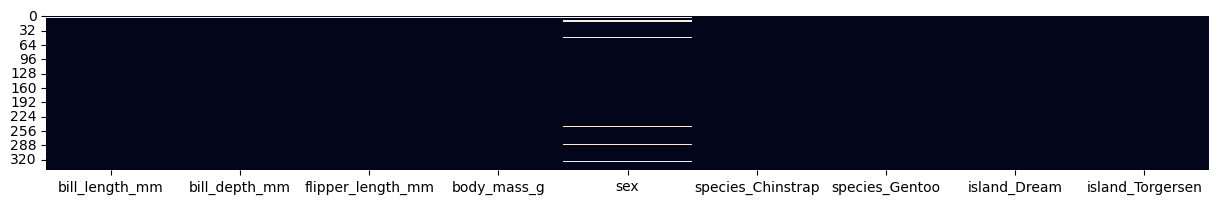

In [73]:
# set the figure size
plt.rcParams["figure.figsize"]=[15,2]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(exe.isnull(), cbar = False)

# display the plot
plt.show()

***We have ensured that there are no missing values in the dataset.***

In [74]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Label Encoding

In [75]:
# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder
peng['sex'] = labelencoder.fit_transform(peng['sex'])

# display 5 observations
exe.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
325,46.8,16.1,215.0,5500.0,Male,False,True,False,False
287,49.5,16.2,229.0,5800.0,Male,False,True,False,False
317,46.9,14.6,222.0,4875.0,Female,False,True,False,False
48,36.0,17.9,190.0,3450.0,Female,False,False,True,False
104,37.9,18.6,193.0,2925.0,Female,False,False,False,False


## One-Hot Encoding

*Let's encode the columns, `species`, `island`*

In [76]:
print("Species:", peng.species.unique())
print("Island:", peng.island.unique())

Species: ['Adelie' 'Chinstrap' 'Gentoo']
Island: ['Torgersen' 'Biscoe' 'Dream']


In [77]:
peng = pd.get_dummies(peng, columns= ['species', 'island'], drop_first = True)

# display 6 sample observations
peng.sample(6)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
321,55.9,17.0,228.0,5600.0,1,False,True,False,False
152,46.5,17.9,192.0,3500.0,0,True,False,True,False
177,52.0,19.0,197.0,4150.0,1,True,False,True,False
322,47.2,15.5,215.0,4975.0,0,False,True,False,False
68,35.9,16.6,190.0,3050.0,0,False,False,False,True
66,35.5,16.2,195.0,3350.0,0,False,False,False,False


In [78]:
peng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    int32  
 5   species_Chinstrap  333 non-null    bool   
 6   species_Gentoo     333 non-null    bool   
 7   island_Dream       333 non-null    bool   
 8   island_Torgersen   333 non-null    bool   
dtypes: bool(4), float64(4), int32(1)
memory usage: 15.6 KB


## Data Visualizations

Let's `visualise` the data to understand it better.

### Plotting relation between pulse, diet and kind

In [79]:
melt = pd.melt(peng, id_vars='sex', value_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], 
                    var_name='var', value_name='value')

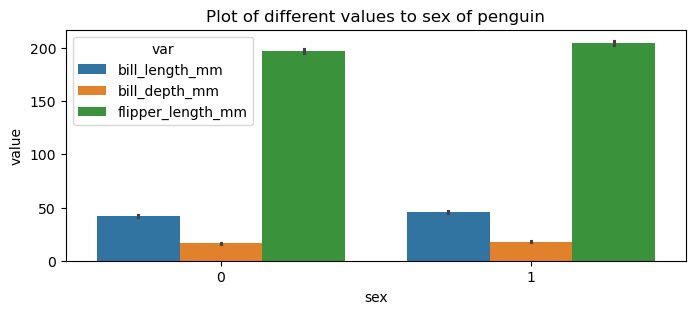

In [80]:
plt.figure(figsize=(8, 3))
sns.barplot(x='sex', y='value', hue = 'var', data=melt)
plt.title('Plot of different values to sex of penguin')
plt.show()

## Outlier Treatment

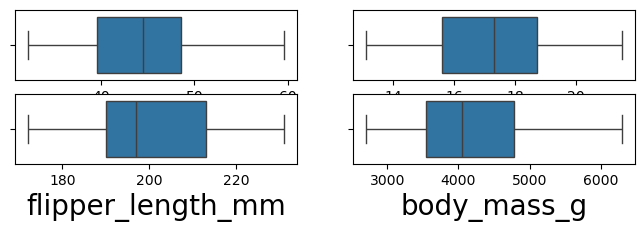

In [81]:
# let's first plot the outliers.
variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
fig, ax = plt.subplots(2, 2, figsize=(8, 2))

for variable, subplot in zip(peng[variables], ax.flatten()):
    z = sns.boxplot(x=peng[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)
plt.show()

**We have ensured that there are no outliers in the data.**

## Scaling and Train-test Split

In [82]:
# select the target variable
Y = peng['sex']

# select all the independent variables
# by dropping the target variable
X = peng.drop(['sex'], axis = 1)

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.tail()

,0,1,2,3,4,5,6,7
328,0.549091,0.071429,0.711864,0.618056,0.0,1.0,0.0,0.0
329,0.534545,0.142857,0.728814,0.597222,0.0,1.0,0.0,0.0
330,0.665455,0.309524,0.847458,0.847222,0.0,1.0,0.0,0.0
331,0.476364,0.202381,0.677966,0.694444,0.0,1.0,0.0,0.0
332,0.647273,0.357143,0.694915,0.750000,0.0,1.0,0.0,0.0


## Train and Test Split

In [84]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state=197)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",y_train.shape)

# print the shape of 'y_test'
print("Y_test ",y_test.shape)

X_train  (233, 8)
X_test  (100, 8)
Y_train  (233,)
Y_test  (100,)


## KNN Classification

In [85]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,20,2)

Best k value: 5


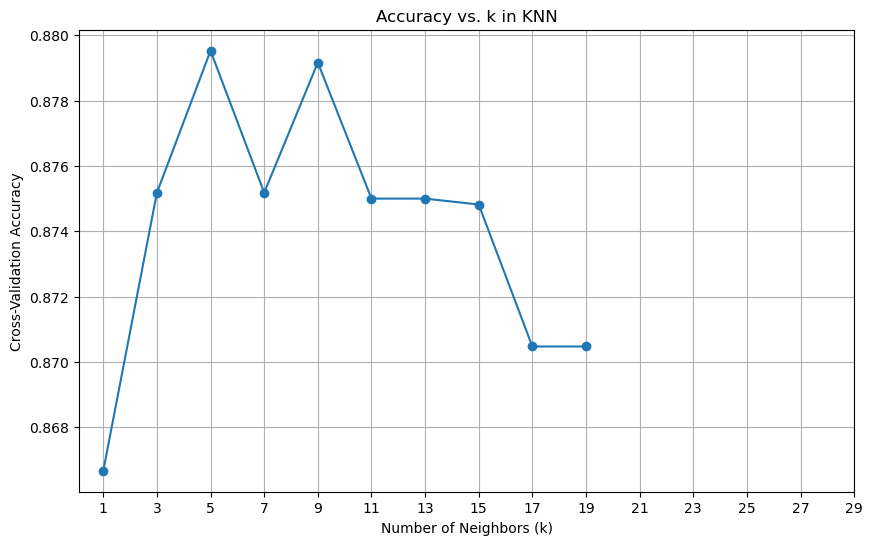

In [86]:
cv_scores = []          # List to hold cross-validation scores

# Find the best k value using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(scores.mean())  # Mean accuracy for each k

# Determine the optimal k (the one with the highest accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k value: {best_k}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

*Let's take the best k value, k = 5*

In [87]:
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)  # Fit the model

# Set initial threshold
threshold = 0.5

# Predict probabilities for the training set
train_proba = model.predict_proba(X_train)[:, 1]
print(model.predict_proba(X_train)[0:20])

[[1.  0. ]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [0.8 0.2]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


Train proba: [0.  0.  0.2 0.  0.2 0.  0.  0.  0.  1.  1.  0.  0.4 0.8 0.  1.  1.  1.
 0.  0.  1.  1.  0.  0.  0.6 0.  1.  0.  0.6 1.  1.  0.4 0.  1.  1.  1.
 1.  0.  1.  1.  0.  0.  0.6 0.4 0.  0.  0.  0.  1.  1.  0.  0.  0.6 1.
 0.  1.  1.  0.6 0.6 0.8 0.  0.  1.  0.  1.  0.4 0.8 1.  0.  1.  0.6 0.6
 0.  0.4 1.  0.2 0.8 1.  1.  1.  0.4 1.  0.  0.6 1.  0.8 0.8 0.  0.  0.
 0.  1.  0.  0.  0.8 0.2 0.8 0.6 0.  1.  1.  1.  1.  0.  0.8 0.  0.  1.
 0.  1.  1.  0.8 0.  0.8 0.2 0.  1.  1.  0.2 0.8 0.  0.4 0.  1.  0.  0.2
 0.  0.6 0.2 1.  0.  0.2 0.8 0.6 0.  1.  0.  0.  1.  0.6 0.2 0.6 1.  0.4
 0.  1.  0.4 1.  0.  0.  1.  0.4 1.  0.4 0.  1.  0.  0.6 0.6 0.2 1.  1.
 0.4 0.  0.4 1.  0.2 1.  0.  0.2 0.8 0.8 0.  1.  1.  1.  0.  1.  1.  1.
 0.6 0.  1.  0.6 1.  0.2 0.  1.  0.6 1.  0.  0.6 0.  0.2 0.  1.  0.8 0.4
 1.  0.  0.  1.  0.8 1.  1.  0.6 1.  0.2 0.4 0.  0.6 0.2 1.  0.8 0.  0.2
 0.6 1.  1.  0.  1.  0.4 0.2 1.  1.  0.  0.  0.  0.6 0.  1.  1.  0. ]
Confusion Matrix:
 [[46  3]
 [ 5 46]]


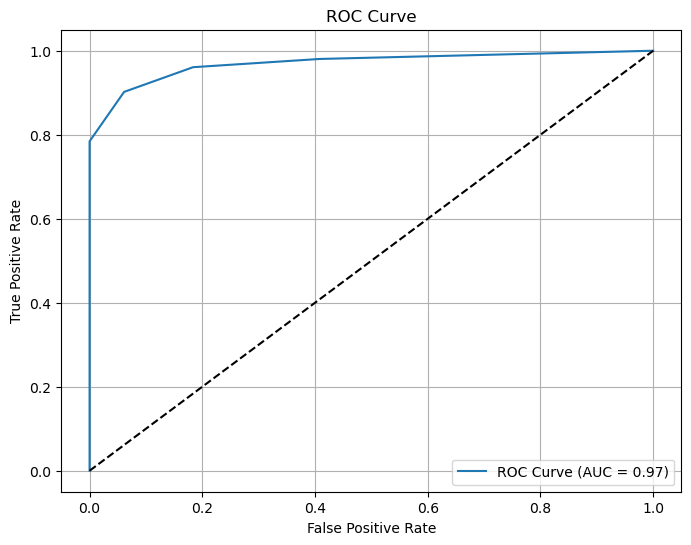

Best Threshold: 0.6
Confusion Matrix with Best Threshold:
 [[46  3]
 [ 5 46]]


In [88]:
print("Train proba:", train_proba)

# Predict classes based on the threshold for training set
y_train_pred = (train_proba >= threshold).astype(int)

# Similarly, predict probabilities for the test set
test_proba = model.predict_proba(X_test)[:, 1]

# Predict classes based on the threshold for test set
y_test_pred = (test_proba >= threshold).astype(int)

# Confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Initialize lists to store TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(fprs, tprs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)

**Inference:** We can observe that AUC = 0.97, so, this model is good.

## Decision Tree Classification

In [89]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [90]:
dtc = clf.fit(X_scaled,Y)

In [99]:
# feature importance
pd.DataFrame({'features':[0,1,2,3,4,5,6,7], 'importance':dtc.feature_importances_})

,features,importance
0,0,0.118582
1,1,0.484548
2,2,0.032357
3,3,0.363891
4,4,0.000622
5,5,0.000000
6,6,0.000000
7,7,0.000000


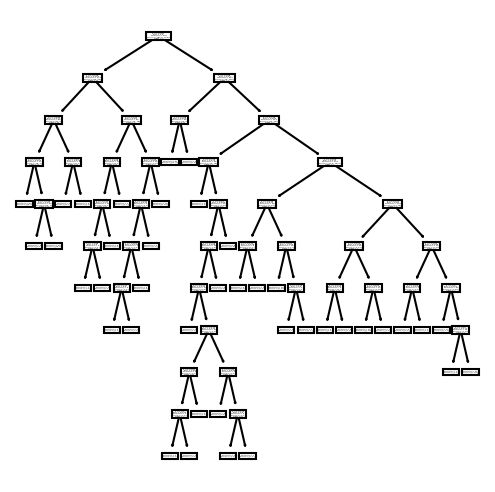

In [100]:
plt.figure(figsize=(4,4), dpi=150)
plot_tree(dtc, feature_names=X_scaled.columns, class_names=['N','Y']);

In [101]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
model = clf.fit(X_scaled,Y)

In [102]:
threshold = 0.99
yhat = []
for i in model.predict_proba(X_scaled)[:,1]:
    if i > threshold:
        yhat.append(1)
    else:
        yhat.append(0)
print(yhat)

[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]


**Inference:** We have obtained the significance of each of the features in predicting the label value and we have obtained the predicted values for the test values using Gini reduction method and the entropy method.

## Logistic Regression

In [103]:
lr = LogisticRegression()
lr.fit(X_scaled, Y)

LogisticRegression()

In [104]:
# Predict probabilities and add to dataframe
peng.loc[:,'prob'] = model.predict_proba(X_scaled)[:, 1]
peng['prob']

0      1.0
1      0.0
2      0.0
4      0.0
5      1.0
      ... 
338    0.0
340    0.0
341    1.0
342    0.0
343    1.0
Name: prob, Length: 333, dtype: float64

In [105]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [107]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (peng['prob'] > threshold).astype(int)
    cm = confusion_matrix(Y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(Y,y_pred)})

In [108]:
# Compute AUC
auc = roc_auc_score(Y, peng['prob'])

In [109]:
# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

    Threshold     TP     TN   FP     FN  TPR  FPR
0         0.0  168.0  165.0  0.0    0.0  1.0  0.0
1         0.1  168.0  165.0  0.0    0.0  1.0  0.0
2         0.2  168.0  165.0  0.0    0.0  1.0  0.0
3         0.3  168.0  165.0  0.0    0.0  1.0  0.0
4         0.4  168.0  165.0  0.0    0.0  1.0  0.0
5         0.5  168.0  165.0  0.0    0.0  1.0  0.0
6         0.6  168.0  165.0  0.0    0.0  1.0  0.0
7         0.7  168.0  165.0  0.0    0.0  1.0  0.0
8         0.8  168.0  165.0  0.0    0.0  1.0  0.0
9         0.9  168.0  165.0  0.0    0.0  1.0  0.0
10        1.0    0.0  165.0  0.0  168.0  0.0  0.0
AUC: 1.0


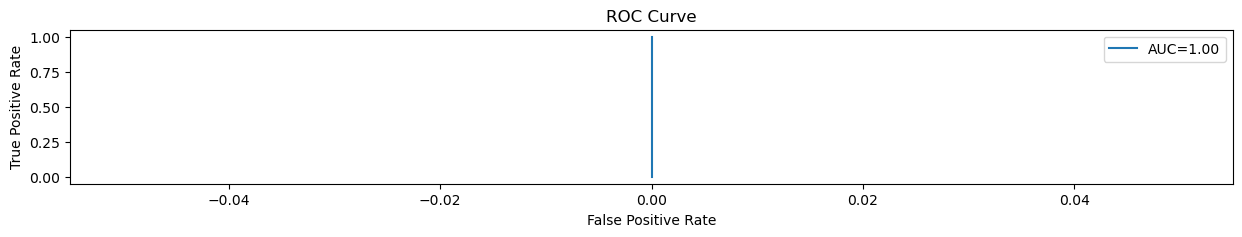

In [110]:
# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**We can infer that the number FPR is 0, indicating there are no false positives predicted by the model, AUC = 1, TPR = 1, indicating that it is a perfect model.**